# Observer 20200809 ktrees

In [1]:

import torch
from torch.utils.data import DataLoader
import torch.optim as optim
import torch.nn as nn
import numpy as np
import math
import torchvision
from torchvision import transforms
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import matplotlib
import matplotlib.pyplot as plt
from torch.optim.optimizer import required
from torch.utils.data.dataset import random_split
import scipy
import os
import glob
import pandas as pd
from hyperopt import hp, tpe, fmin, Trials
import pickle

% matplotlib inline

In [2]:
# Load data

# loss_0 = np.load('../20200325/k_tree_loss_0.npy')
# loss_1 = np.load('../20200325/k_tree_loss_1.npy')
# loss_2 = np.load('../20200325/k_tree_loss_2.npy')
# loss_3 = np.load('../20200325/k_tree_loss_3.npy')
# loss_4 = np.load('../20200316/k_tree_acc.npy')

# loss_1[1] = loss_3

# loss = np.concatenate((loss_0,loss_1), 0)
# loss = np.concatenate((loss,loss_2), 0)
# loss = np.concatenate((loss,loss_4.reshape(1,10,6)), 0)

# loss_0_64 = np.load('../20200325/k_tree_loss_0_64.npy')
# loss_1_64 = np.load('../20200325/k_tree_loss_1_64.npy')
# loss_2_64 = np.load('../20200325/k_tree_loss_2_64.npy')
# # loss_4_64 = np.load('./k_tree_loss_4_64.npy')

# loss_64 = np.concatenate((loss_0_64, loss_1_64), 0)
# loss_64 = np.concatenate((loss_64, loss_2_64), 0)
# # loss_64 = np.concatenate((loss_64, loss_4_64), 0)


# # loss = np.concatenate((loss, loss_64), 2)

# acc_0 = np.load('../20200325/k_tree_acc_0.npy')
# acc_1 = np.load('../20200325/k_tree_acc_1.npy')
# acc_2 = np.load('../20200325/k_tree_acc_2.npy')
# acc_3 = np.load('../20200325/k_tree_acc_3.npy')
# acc_4 = np.load('../20200316/k_tree_loss.npy')

# acc_1[1] = acc_3

# acc = np.concatenate((acc_0,acc_1), 0)
# acc = np.concatenate((acc,acc_2), 0)
# acc = np.concatenate((acc, acc_4.reshape(1,10,6)), 0)


# acc_0_64 = np.load('../20200325/k_tree_acc_0_64.npy')
# acc_1_64 = np.load('../20200325/k_tree_acc_1_64.npy')
# acc_2_64 = np.load('../20200325/k_tree_acc_2_64.npy')
# # acc_4_64 = np.load('./k_tree_acc_4_64.npy')

# acc_64 = np.concatenate((acc_0_64, acc_1_64), 0)
# acc_64 = np.concatenate((acc_64, acc_2_64), 0)
# # acc_64 = np.concatenate((acc_64, acc_4_64), 0)


# # acc = np.concatenate((acc, acc_64), 2)

# acc_fc_old = np.load('../20200325/fc_acc.npy')
# acc_fc_emnist_old = np.load('../20200325/fc_acc_emnist.npy')
# acc_fc_cifar10_old = np.load('../20200325/fc_acc_cifar10.npy')
# acc_fc_old[3] = acc_fc_emnist_old
# acc_fc_old = np.concatenate((acc_fc_old, acc_fc_cifar10_old), 0)

acc_fc = np.load('../20200513/fc_acc.npy')

acc_fc_new = np.load('../20200809/fcnn_acc_0.npy')

# acc_fc = np.load('./fc_acc.npy')

# acc_lin_old = np.load('../20200325/lda_score_test.npy')
# acc_lin_emnist_old = np.load('../20200325/lda_score_test_emnist.npy')
# acc_lin_cifar10_old= np.load('../20200325/lda_score_test_cifar10.npy')
# acc_lin_old[3] = acc_lin_emnist_old
# acc_lin_old = np.concatenate((acc_lin_old, acc_lin_cifar10_old), 0)

acc_lin = np.load('../20200513/lda_score_test.npy')

# Load randomized input data
# rand_acc_0_old = np.load('../20200504/k_tree_acc_rand_0.npy')
# rand_acc_1_old = np.load('../20200504/k_tree_acc_rand_1.npy')
# rand_acc_2_old = np.load('../20200504/k_tree_acc_rand_2.npy')
# rand_acc_3_old = np.load('../20200504/k_tree_acc_rand_3.npy')

# rand_acc_old = np.concatenate((rand_acc_0_old,rand_acc_1_old), 0)
# rand_acc_old = np.concatenate((rand_acc_old,rand_acc_2_old), 0)
# rand_acc_old = np.concatenate((rand_acc_old, rand_acc_3_old.reshape(1,10,6)), 0)


# rand_acc_0 = np.load('../20200513/k_tree_acc_rand_0.npy')
# rand_acc_1 = np.load('../20200513/k_tree_acc_rand_1.npy')
# rand_acc_2 = np.load('../20200513/k_tree_acc_rand_2.npy')
# rand_acc_3 = np.load('../20200513/k_tree_acc_rand_3.npy')

# rand_acc = np.concatenate((rand_acc_0,rand_acc_1), 0)
# rand_acc = np.concatenate((rand_acc,rand_acc_2), 0)
# rand_acc = np.concatenate((rand_acc, rand_acc_3.reshape(1,10,6)), 0)

rand_acc = np.load('../20200809/ktree_acc_rand_0.npy')


#Load permuted input data
# perm_acc_0_old = np.load('../20200508/k_tree_acc_permute_0.npy')
# perm_acc_1_old = np.load('../20200508/k_tree_acc_permute_1.npy')
# perm_acc_2_old = np.load('../20200508/k_tree_acc_permute_2.npy')
# perm_acc_3_old = np.load('../20200508/k_tree_acc_permute_3.npy')

# perm_acc_old = np.concatenate((perm_acc_0_old,perm_acc_1_old), 0)
# perm_acc_old = np.concatenate((perm_acc_old,perm_acc_2_old), 0)
# perm_acc_old = np.concatenate((perm_acc_old, perm_acc_3_old.reshape(1,10,6)), 0)

# perm_acc_0 = np.load('../20200513/k_tree_acc_permute_0.npy')
# perm_acc_1 = np.load('../20200513/k_tree_acc_permute_1.npy')
# perm_acc_2 = np.load('../20200513/k_tree_acc_permute_2.npy')
# perm_acc_3 = np.load('../20200513/k_tree_acc_permute_3.npy')

# perm_acc = np.concatenate((perm_acc_0,perm_acc_1), 0)
# perm_acc = np.concatenate((perm_acc,perm_acc_2), 0)
# perm_acc = np.concatenate((perm_acc, perm_acc_3.reshape(1,10,6)), 0)

perm_acc = np.load('../20200809/ktree_acc_perm_0.npy')

# Load original input data
# orig_acc_0_old = np.load('../20200511/k_tree_acc_orig_0.npy')
# orig_acc_1_old = np.load('../20200511/k_tree_acc_orig_1.npy')
# orig_acc_2_old = np.load('../20200511/k_tree_acc_orig_2.npy')
# orig_acc_3_old = np.load('../20200511/k_tree_acc_orig_3.npy')

# orig_acc_old = np.concatenate((orig_acc_0_old,orig_acc_1_old), 0)
# orig_acc_old = np.concatenate((orig_acc_old,orig_acc_2_old), 0)
# orig_acc_old = np.concatenate((orig_acc_old, orig_acc_3_old.reshape(1,10,6)), 0)


# orig_acc_0 = np.load('../20200513/k_tree_acc_orig_0.npy')
# orig_acc_1 = np.load('../20200513/k_tree_acc_orig_1.npy')
# orig_acc_2 = np.load('../20200513/k_tree_acc_orig_2.npy')
# orig_acc_3 = np.load('../20200513/k_tree_acc_orig_3.npy')

# orig_acc = np.concatenate((orig_acc_0,orig_acc_1), 0)
# orig_acc = np.concatenate((orig_acc,orig_acc_2), 0)
# orig_acc = np.concatenate((orig_acc, orig_acc_3.reshape(1,10,6)), 0)

# acc_old = orig_acc_old
# acc = orig_acc

acc = np.load('../20200809/ktree_acc_orig_0.npy')

In [3]:
acc_fc.shape

(7, 10)

In [4]:
# trees_set = [1,2,4,8,16,32, 64, 128]
trees_set = [1,2,4,8,16,32]

# ds_set = ['mnist','fmnist','kmnist','emnist','svhn','usps']
ds_set = ['MNIST','FMNIST','KMNIST','EMNIST','SVHN','USPS','CIFAR10']

In [5]:
classes = np.load('../20200511/classes.npy', allow_pickle=True)
classes

array([[3, 5, 'mnist'],
       [0, 6, 'fmnist'],
       [2, 6, 'kmnist'],
       [14, 17, 'emnist'],
       [5, 6, 'svhn'],
       [3, 5, 'usps'],
       [3, 5, 'cifar10']], dtype=object)

In [57]:
rand_idx = np.where(rand_acc[ds] > 0.50)
rand_idx = []

for i in range(10):
    if sum(rand_acc[ds, i]>0.50) == 6:
        rand_idx.append(i)

rand_idx

[1, 2, 5, 7, 8, 9]

In [13]:
print(acc_fc_new[0,:,0])
print(acc_fc_new[0,:,1])

[0.97371188 0.97160883 0.96319664 0.96109359 0.97160883 0.97423764
 0.9679285  0.9679285  0.9679285  0.97160883]
[0.97371188 0.97160883 0.96319664 0.96109359 0.97160883 0.97423764
 0.9679285  0.9679285  0.9679285  0.97160883]


n = 10
n = 10
n = 10
lin n =  10
fc n = 10
mean
 [0.96908517 0.96908517 0.96908517 0.96908517 0.96908517 0.96908517]
std
 [0.00411843 0.00411843 0.00411843 0.00411843 0.00411843 0.00411843]


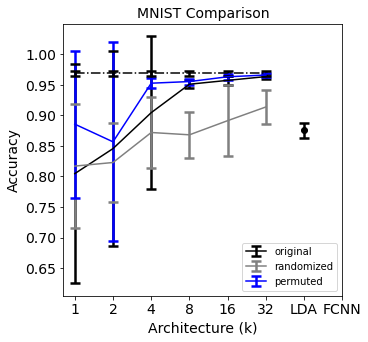

n = 10
n = 10
n = 10
lin n =  10
fc n = 10
mean
 [0.83285 0.83285 0.83285 0.83285 0.83285 0.83285]
std
 [0.00607063 0.00607063 0.00607063 0.00607063 0.00607063 0.00607063]


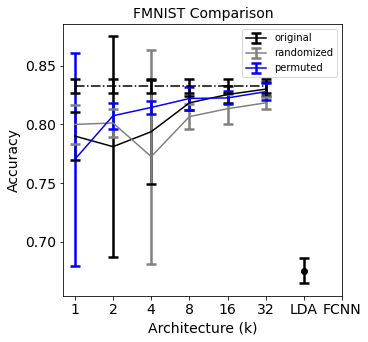

n = 10
n = 10
n = 9
lin n =  10
fc n = 10
mean
 [0.9056 0.9056 0.9056 0.9056 0.9056 0.9056]
std
 [0.00839583 0.00839583 0.00839583 0.00839583 0.00839583 0.00839583]


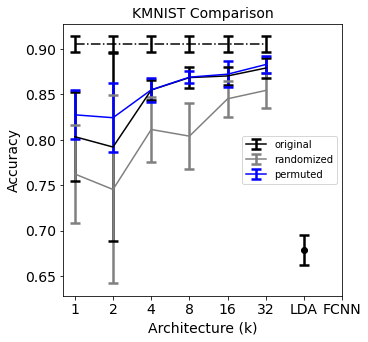

n = 1
n = 10
n = 0
lin n =  10
fc n = 1
mean
 [0.99052478 0.99052478 0.99052478 0.99052478 0.99052478 0.99052478]
std
 [0. 0. 0. 0. 0. 0.]


/home/ilenna/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ilenna/.local/lib/python3.6/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/ilenna/.local/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ilenna/.local/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ilenna/.local/lib/python3.6/site-packages/numpy/core/_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/ilenna/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return a

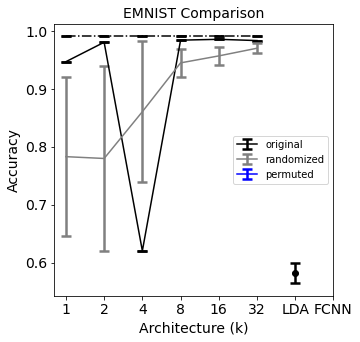

n = 0
n = 10
n = 0
lin n =  10
fc n = 0
mean
 [nan nan nan nan nan nan]
std
 [nan nan nan nan nan nan]


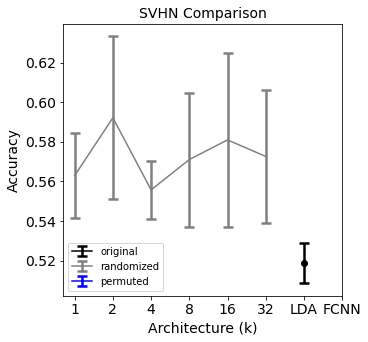

n = 0
n = 9
n = 0
lin n =  10
fc n = 0
mean
 [nan nan nan nan nan nan]
std
 [nan nan nan nan nan nan]


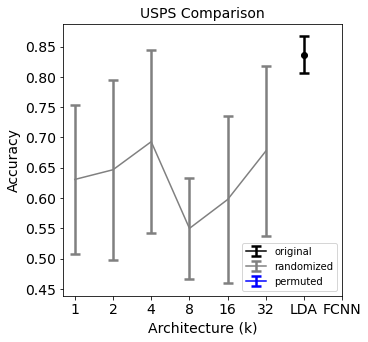

n = 0
n = 9
n = 0
lin n =  10
fc n = 0
mean
 [nan nan nan nan nan nan]
std
 [nan nan nan nan nan nan]


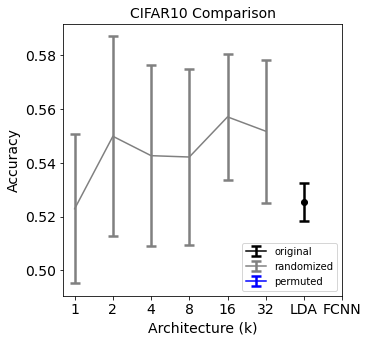

In [9]:
# Plot orig only with new fcnn


for ds, ds_name in enumerate(ds_set):

    fig, ax = plt.subplots(figsize=(5,5))

    x = np.arange(len(trees_set))
        
    # Orig
    idx = np.where(acc[ds,:,-1] != 0)[-1]
    print('n =',len(idx))
    acc_mean = np.mean(acc[ds,idx,:], axis=0)
    acc_std = np.std(acc[ds,idx,:], axis=0)

    ax.errorbar(x, acc_mean, yerr=acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='black')
    
    # Rand
    rand_idx = np.where(rand_acc[ds,:,-1] > 0.50)[-1]
    print('n =',len(rand_idx))
    rand_acc_mean = np.mean(rand_acc[ds,rand_idx,:], axis=0)
    rand_acc_std = np.std(rand_acc[ds,rand_idx,:], axis=0)

    ax.errorbar(x, rand_acc_mean, yerr=rand_acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='grey')
    
    # Perm
    perm_idx = np.where(perm_acc[ds,:,-1] > 0.50)[-1]
    print('n =',len(perm_idx))
    perm_acc_mean = np.mean(perm_acc[ds,perm_idx,:], axis=0)
    perm_acc_std = np.std(perm_acc[ds,perm_idx,:], axis=0)

    ax.errorbar(x, perm_acc_mean, yerr=perm_acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='blue')

    # LDA
    idxl = np.where(acc_lin[ds,:] > 0.50)[0]
    print('lin n = ', len(idxl))
    acc_lin_mean = np.mean(acc_lin[ds,idxl])
    acc_lin_std = np.std(acc_lin[ds,idxl])
    ax.errorbar(6, acc_lin_mean, yerr=acc_lin_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')

    # FCNN
#     idxf = np.where(acc_fc[ds,:] > 0.50)[0]
#     print('fc n = ', len(idxf))
#     acc_fc_mean = np.mean(acc_fc[ds,idxf])
#     acc_fc_std = np.std(acc_fc[ds,idxf])
#     ax.errorbar(7, acc_fc_mean, yerr=acc_fc_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')
    idxf = np.where(acc[ds,:,-1] != 0)[-1]
    print('fc n =',len(idxf))
    acc_fc_mean = np.mean(acc_fc_new[ds,idxf,:], axis=0)
    acc_fc_std = np.std(acc_fc_new[ds,idxf,:], axis=0)
    print('mean\n', acc_fc_mean)
    print('std\n', acc_fc_std)
    ax.errorbar(x, acc_fc_mean, yerr=acc_fc_std, capsize=5, capthick=2.5, elinewidth=2.5, ls='-.', c='black')

    ax.set_xticks(np.arange(len(trees_set)+2))
    ax.set_xticklabels(np.concatenate((trees_set,['LDA'],['FCNN']),0), fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_xlabel('Architecture (k)', fontsize=14)
    plt.yticks(fontsize=14)

    ax.set_title(ds_name+' Comparison', fontsize=14)
    ax.legend(['original','randomized','permuted'])


        
#     print('\nOriginal Input')
#     print('\nValues')
#     for j, n_tree in enumerate(trees_set):
#         print('%s : %.4f +/- %.4f' % (n_tree, acc_mean[j], acc_std[j]))
       
#     print('\nBounds')
#     print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
#     print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
#     print('\nComparisons')
#     for j, n_tree in enumerate(trees_set):
#         _, compare = scipy.stats.ttest_ind(acc[ds,idx,j], acc_fc[ds,idxf])
#         print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
#     _, compare_1v32 = scipy.stats.ttest_ind(acc[ds,idx,0], acc[ds,idx,5])
#     print('1 v 32  -  p = %.4f' % compare_1v32)
#     _, compare_1vlda = scipy.stats.ttest_ind(acc[ds,idx,0], acc_lin[ds,idxl])
#     print('1 v lda  -  p = %.4f' % compare_1vlda)
#     _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
#     print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
    
#     print('\nPermuted Input')
#     print('\nValues')
#     for j, n_tree in enumerate(trees_set):
#         print('%s : %.4f +/- %.4f' % (n_tree, perm_acc_mean[j], perm_acc_std[j]))
       
#     print('\nBounds')
#     print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
#     print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
#     print('\nComparisons')
#     for j, n_tree in enumerate(trees_set):
#         _, compare = scipy.stats.ttest_ind(perm_acc[ds,idx,j], acc_fc[ds,idxf])
#         print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
#     _, compare_1v32 = scipy.stats.ttest_ind(perm_acc[ds,idx,0], perm_acc[ds,idx,5])
#     print('1 v 32  -  p = %.4f' % compare_1v32)
#     _, compare_1vlda = scipy.stats.ttest_ind(perm_acc[ds,idx,0], acc_lin[ds,idxl])
#     print('1 v lda  -  p = %.4f' % compare_1vlda)
#     _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
#     print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
#     print('\nRandom Input')
#     print('\nValues')
#     for j, n_tree in enumerate(trees_set):
#         print('%s : %.4f +/- %.4f' % (n_tree, rand_acc_mean[j], rand_acc_std[j]))
       
#     print('\nBounds')
#     print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
#     print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
#     print('\nComparisons')
#     for j, n_tree in enumerate(trees_set):
#         _, compare = scipy.stats.ttest_ind(rand_acc[ds,idx,j], acc_fc[ds,idxf])
#         print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
#     _, compare_1v32 = scipy.stats.ttest_ind(rand_acc[ds,idx,0], rand_acc[ds,idx,5])
#     print('1 v 32  -  p = %.4f' % compare_1v32)
#     _, compare_1vlda = scipy.stats.ttest_ind(rand_acc[ds,idx,0], acc_lin[ds,idxl])
#     print('1 v lda  -  p = %.4f' % compare_1vlda)
#     _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
#     print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
#     plt.savefig(ds_name+'_rand_perm.svg', format='svg')
    
    plt.show()


n = 10
n = 10
n = 10
lin n =  10
fc n =  10

Original Input

Values
1 : 0.8047 +/- 0.1798
2 : 0.8456 +/- 0.1589
4 : 0.9045 +/- 0.1249
8 : 0.9510 +/- 0.0064
16 : 0.9573 +/- 0.0074
32 : 0.9635 +/- 0.0043

Bounds
lda: 0.8753 +/- 0.0120
fcnn: 0.9753 +/- 0.0120

Comparisons
1 v fcnn  -  p = 0.0109
2 v fcnn  -  p = 0.0253
4 v fcnn  -  p = 0.1077
8 v fcnn  -  p = 0.0000
16 v fcnn  -  p = 0.0013
32 v fcnn  -  p = 0.0129
1 v 32  -  p = 0.0163
1 v lda  -  p = 0.2550
lda v fcnn  -  p = 0.0000

Permuted Input

Values
1 : 0.8856 +/- 0.1202
2 : 0.8567 +/- 0.1630
4 : 0.9527 +/- 0.0077
8 : 0.9554 +/- 0.0048
16 : 0.9632 +/- 0.0051
32 : 0.9660 +/- 0.0033

Bounds
lda: 0.8753 +/- 0.0120
fcnn: 0.9753 +/- 0.0120

Comparisons
1 v fcnn  -  p = 0.0390
2 v fcnn  -  p = 0.0432
4 v fcnn  -  p = 0.0002
8 v fcnn  -  p = 0.0002
16 v fcnn  -  p = 0.0125
32 v fcnn  -  p = 0.0392
1 v 32  -  p = 0.0601
1 v lda  -  p = 0.7999
lda v fcnn  -  p = 0.0000

Random Input

Values
1 : 0.8170 +/- 0.1016
2 : 0.8229 +/- 0.0647
4 : 

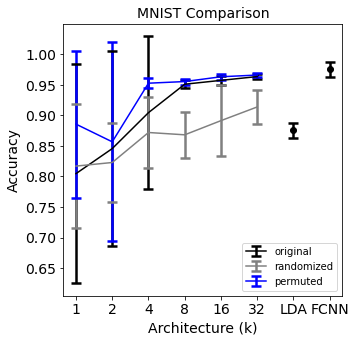

n = 10
n = 10
n = 10
lin n =  10
fc n =  10

Original Input

Values
1 : 0.7900 +/- 0.0202
2 : 0.7810 +/- 0.0941
4 : 0.7937 +/- 0.0443
8 : 0.8184 +/- 0.0058
16 : 0.8254 +/- 0.0073
32 : 0.8300 +/- 0.0063

Bounds
lda: 0.6750 +/- 0.0108
fcnn: 0.8395 +/- 0.0260

Comparisons
1 v fcnn  -  p = 0.0003
2 v fcnn  -  p = 0.0889
4 v fcnn  -  p = 0.0155
8 v fcnn  -  p = 0.0286
16 v fcnn  -  p = 0.1362
32 v fcnn  -  p = 0.3035
1 v 32  -  p = 0.0000
1 v lda  -  p = 0.0000
lda v fcnn  -  p = 0.0000

Permuted Input

Values
1 : 0.7701 +/- 0.0908
2 : 0.8073 +/- 0.0109
4 : 0.8144 +/- 0.0054
8 : 0.8220 +/- 0.0100
16 : 0.8226 +/- 0.0056
32 : 0.8279 +/- 0.0070

Bounds
lda: 0.6750 +/- 0.0108
fcnn: 0.8395 +/- 0.0260

Comparisons
1 v fcnn  -  p = 0.0406
2 v fcnn  -  p = 0.0030
4 v fcnn  -  p = 0.0110
8 v fcnn  -  p = 0.0768
16 v fcnn  -  p = 0.0722
32 v fcnn  -  p = 0.2127
1 v 32  -  p = 0.0727
1 v lda  -  p = 0.0059
lda v fcnn  -  p = 0.0000

Random Input

Values
1 : 0.7999 +/- 0.0168
2 : 0.8012 +/- 0.0120
4 : 

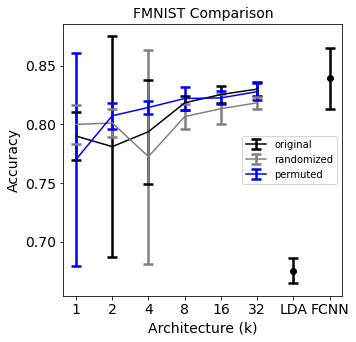

n = 10
n = 10
n = 9
lin n =  10
fc n =  10

Original Input

Values
1 : 0.8035 +/- 0.0488
2 : 0.7921 +/- 0.1037
4 : 0.8549 +/- 0.0111
8 : 0.8686 +/- 0.0118
16 : 0.8704 +/- 0.0098
32 : 0.8791 +/- 0.0113

Bounds
lda: 0.6790 +/- 0.0164
fcnn: 0.9440 +/- 0.0114

Comparisons
1 v fcnn  -  p = 0.0000
2 v fcnn  -  p = 0.0004
4 v fcnn  -  p = 0.0000
8 v fcnn  -  p = 0.0000
16 v fcnn  -  p = 0.0000
32 v fcnn  -  p = 0.0000
1 v 32  -  p = 0.0003
1 v lda  -  p = 0.0000
lda v fcnn  -  p = 0.0000

Permuted Input

Values
1 : 0.8276 +/- 0.0270
2 : 0.8244 +/- 0.0377
4 : 0.8551 +/- 0.0135
8 : 0.8691 +/- 0.0064
16 : 0.8723 +/- 0.0146
32 : 0.8830 +/- 0.0089

Bounds
lda: 0.6790 +/- 0.0164
fcnn: 0.9440 +/- 0.0114

Comparisons
1 v fcnn  -  p = 0.0000
2 v fcnn  -  p = 0.0000
4 v fcnn  -  p = 0.0000
8 v fcnn  -  p = 0.0000
16 v fcnn  -  p = 0.0000
32 v fcnn  -  p = 0.1086
1 v 32  -  p = 0.7017
1 v lda  -  p = 0.0000
lda v fcnn  -  p = 0.0000

Random Input

Values
1 : 0.7624 +/- 0.0537
2 : 0.7454 +/- 0.1035
4 : 0

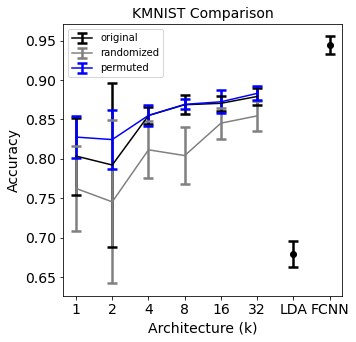

n = 1
n = 10
n = 0
lin n =  10
fc n =  10

Original Input

Values
1 : 0.9468 +/- 0.0000
2 : 0.9803 +/- 0.0000
4 : 0.6203 +/- 0.0000
8 : 0.9840 +/- 0.0000
16 : 0.9854 +/- 0.0000
32 : 0.9832 +/- 0.0000

Bounds
lda: 0.5821 +/- 0.0180
fcnn: 0.9898 +/- 0.0088

Comparisons
1 v fcnn  -  p = nan
2 v fcnn  -  p = nan
4 v fcnn  -  p = nan
8 v fcnn  -  p = nan
16 v fcnn  -  p = nan
32 v fcnn  -  p = nan
1 v 32  -  p = nan
1 v lda  -  p = nan
lda v fcnn  -  p = 0.0000

Permuted Input

Values
1 : nan +/- nan
2 : nan +/- nan
4 : nan +/- nan
8 : nan +/- nan
16 : nan +/- nan
32 : nan +/- nan

Bounds
lda: 0.5821 +/- 0.0180
fcnn: 0.9898 +/- 0.0088

Comparisons
1 v fcnn  -  p = nan
2 v fcnn  -  p = nan
4 v fcnn  -  p = nan
8 v fcnn  -  p = nan
16 v fcnn  -  p = nan
32 v fcnn  -  p = nan
1 v 32  -  p = nan
1 v lda  -  p = nan
lda v fcnn  -  p = 0.0000

Random Input

Values
1 : 0.7829 +/- 0.1369
2 : 0.7797 +/- 0.1596
4 : 0.8605 +/- 0.1214
8 : 0.9448 +/- 0.0236
16 : 0.9568 +/- 0.0159
32 : 0.9700 +/- 0.0086


/home/ilenna/.local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/ilenna/.local/lib/python3.6/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/ilenna/.local/lib/python3.6/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/ilenna/.local/lib/python3.6/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/home/ilenna/.local/lib/python3.6/site-packages/numpy/core/_methods.py:224: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)
/home/ilenna/.local/lib/python3.6/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return a

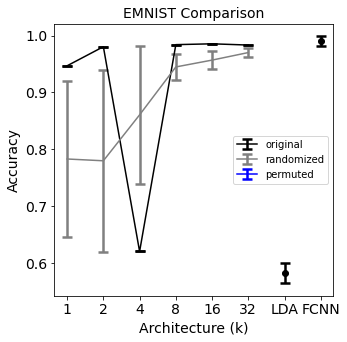

n = 0
n = 10
n = 0
lin n =  10
fc n =  9

Original Input

Values
1 : nan +/- nan
2 : nan +/- nan
4 : nan +/- nan
8 : nan +/- nan
16 : nan +/- nan
32 : nan +/- nan

Bounds
lda: 0.5186 +/- 0.0102
fcnn: 0.7021 +/- 0.1495

Comparisons
1 v fcnn  -  p = nan
2 v fcnn  -  p = nan
4 v fcnn  -  p = nan
8 v fcnn  -  p = nan
16 v fcnn  -  p = nan
32 v fcnn  -  p = nan
1 v 32  -  p = nan
1 v lda  -  p = nan
lda v fcnn  -  p = 0.0019

Permuted Input

Values
1 : nan +/- nan
2 : nan +/- nan
4 : nan +/- nan
8 : nan +/- nan
16 : nan +/- nan
32 : nan +/- nan

Bounds
lda: 0.5186 +/- 0.0102
fcnn: 0.7021 +/- 0.1495

Comparisons
1 v fcnn  -  p = nan
2 v fcnn  -  p = nan
4 v fcnn  -  p = nan
8 v fcnn  -  p = nan
16 v fcnn  -  p = nan
32 v fcnn  -  p = nan
1 v 32  -  p = nan
1 v lda  -  p = nan
lda v fcnn  -  p = 0.0019

Random Input

Values
1 : 0.5629 +/- 0.0214
2 : 0.5921 +/- 0.0411
4 : 0.5557 +/- 0.0147
8 : 0.5710 +/- 0.0338
16 : 0.5809 +/- 0.0440
32 : 0.5726 +/- 0.0336

Bounds
lda: 0.5186 +/- 0.0102
fcnn: 

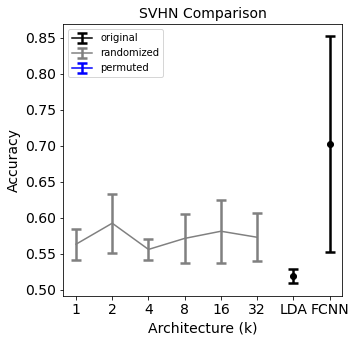

n = 0
n = 9
n = 0
lin n =  10
fc n =  10

Original Input

Values
1 : nan +/- nan
2 : nan +/- nan
4 : nan +/- nan
8 : nan +/- nan
16 : nan +/- nan
32 : nan +/- nan

Bounds
lda: 0.8362 +/- 0.0306
fcnn: 0.9437 +/- 0.0364

Comparisons
1 v fcnn  -  p = nan
2 v fcnn  -  p = nan
4 v fcnn  -  p = nan
8 v fcnn  -  p = nan
16 v fcnn  -  p = nan
32 v fcnn  -  p = nan
1 v 32  -  p = nan
1 v lda  -  p = nan
lda v fcnn  -  p = 0.0000

Permuted Input

Values
1 : nan +/- nan
2 : nan +/- nan
4 : nan +/- nan
8 : nan +/- nan
16 : nan +/- nan
32 : nan +/- nan

Bounds
lda: 0.8362 +/- 0.0306
fcnn: 0.9437 +/- 0.0364

Comparisons
1 v fcnn  -  p = nan
2 v fcnn  -  p = nan
4 v fcnn  -  p = nan
8 v fcnn  -  p = nan
16 v fcnn  -  p = nan
32 v fcnn  -  p = nan
1 v 32  -  p = nan
1 v lda  -  p = nan
lda v fcnn  -  p = 0.0000

Random Input

Values
1 : 0.6305 +/- 0.1232
2 : 0.6466 +/- 0.1485
4 : 0.6929 +/- 0.1507
8 : 0.5498 +/- 0.0828
16 : 0.5975 +/- 0.1386
32 : 0.6776 +/- 0.1402

Bounds
lda: 0.8362 +/- 0.0306
fcnn: 

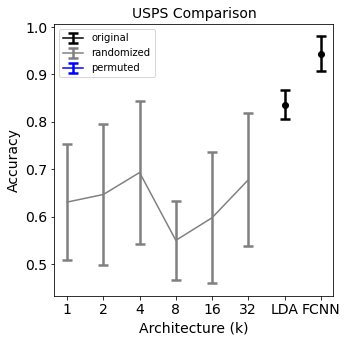

n = 0
n = 9
n = 0
lin n =  10
fc n =  7

Original Input

Values
1 : nan +/- nan
2 : nan +/- nan
4 : nan +/- nan
8 : nan +/- nan
16 : nan +/- nan
32 : nan +/- nan

Bounds
lda: 0.5254 +/- 0.0069
fcnn: 0.5586 +/- 0.0354

Comparisons
1 v fcnn  -  p = nan
2 v fcnn  -  p = nan
4 v fcnn  -  p = nan
8 v fcnn  -  p = nan
16 v fcnn  -  p = nan
32 v fcnn  -  p = nan
1 v 32  -  p = nan
1 v lda  -  p = nan
lda v fcnn  -  p = 0.0162

Permuted Input

Values
1 : nan +/- nan
2 : nan +/- nan
4 : nan +/- nan
8 : nan +/- nan
16 : nan +/- nan
32 : nan +/- nan

Bounds
lda: 0.5254 +/- 0.0069
fcnn: 0.5586 +/- 0.0354

Comparisons
1 v fcnn  -  p = nan
2 v fcnn  -  p = nan
4 v fcnn  -  p = nan
8 v fcnn  -  p = nan
16 v fcnn  -  p = nan
32 v fcnn  -  p = nan
1 v 32  -  p = nan
1 v lda  -  p = nan
lda v fcnn  -  p = 0.0162

Random Input

Values
1 : 0.5229 +/- 0.0278
2 : 0.5499 +/- 0.0372
4 : 0.5427 +/- 0.0336
8 : 0.5422 +/- 0.0327
16 : 0.5571 +/- 0.0235
32 : 0.5518 +/- 0.0266

Bounds
lda: 0.5254 +/- 0.0069
fcnn: 0

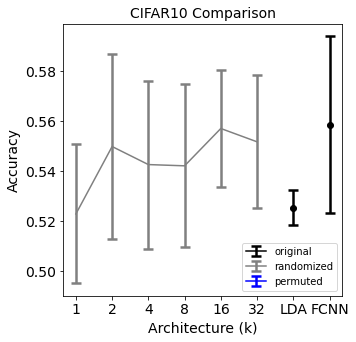

In [6]:
# Plot orig, perm, rand


for ds, ds_name in enumerate(ds_set):

    fig, ax = plt.subplots(figsize=(5,5))

    x = np.arange(len(trees_set))

    idx = np.where(acc[ds,:,-1] != 0)[-1]
    print('n =',len(idx))
    acc_mean = np.mean(acc[ds,idx,:], axis=0)
    acc_std = np.std(acc[ds,idx,:], axis=0)

    ax.errorbar(x, acc_mean, yerr=acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='black')
    
    rand_idx = np.where(rand_acc[ds,:,-1] > 0.50)[-1]
    print('n =',len(rand_idx))
    rand_acc_mean = np.mean(rand_acc[ds,rand_idx,:], axis=0)
    rand_acc_std = np.std(rand_acc[ds,rand_idx,:], axis=0)

    ax.errorbar(x, rand_acc_mean, yerr=rand_acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='grey')
    
    perm_idx = np.where(perm_acc[ds,:,-1] > 0.50)[-1]
    print('n =',len(perm_idx))
    perm_acc_mean = np.mean(perm_acc[ds,perm_idx,:], axis=0)
    perm_acc_std = np.std(perm_acc[ds,perm_idx,:], axis=0)

    ax.errorbar(x, perm_acc_mean, yerr=perm_acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='blue')


    idxl = np.where(acc_lin[ds,:] > 0.50)[0]
    print('lin n = ', len(idxl))
    acc_lin_mean = np.mean(acc_lin[ds,idxl])
    acc_lin_std = np.std(acc_lin[ds,idxl])
    ax.errorbar(6, acc_lin_mean, yerr=acc_lin_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')


    idxf = np.where(acc_fc[ds,:] > 0.50)[0]
    print('fc n = ', len(idxf))
    acc_fc_mean = np.mean(acc_fc[ds,idxf])
    acc_fc_std = np.std(acc_fc[ds,idxf])
    ax.errorbar(7, acc_fc_mean, yerr=acc_fc_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')

    ax.set_xticks(np.arange(len(trees_set)+2))
    ax.set_xticklabels(np.concatenate((trees_set,['LDA'],['FCNN']),0), fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_xlabel('Architecture (k)', fontsize=14)
    plt.yticks(fontsize=14)

    ax.set_title(ds_name+' Comparison', fontsize=14)
    ax.legend(['original','randomized','permuted'])


        
    print('\nOriginal Input')
    print('\nValues')
    for j, n_tree in enumerate(trees_set):
        print('%s : %.4f +/- %.4f' % (n_tree, acc_mean[j], acc_std[j]))
       
    print('\nBounds')
    print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
    print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
    print('\nComparisons')
    for j, n_tree in enumerate(trees_set):
        _, compare = scipy.stats.ttest_ind(acc[ds,idx,j], acc_fc[ds,idxf])
        print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
    _, compare_1v32 = scipy.stats.ttest_ind(acc[ds,idx,0], acc[ds,idx,5])
    print('1 v 32  -  p = %.4f' % compare_1v32)
    _, compare_1vlda = scipy.stats.ttest_ind(acc[ds,idx,0], acc_lin[ds,idxl])
    print('1 v lda  -  p = %.4f' % compare_1vlda)
    _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
    print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
    
    print('\nPermuted Input')
    print('\nValues')
    for j, n_tree in enumerate(trees_set):
        print('%s : %.4f +/- %.4f' % (n_tree, perm_acc_mean[j], perm_acc_std[j]))
       
    print('\nBounds')
    print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
    print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
    print('\nComparisons')
    for j, n_tree in enumerate(trees_set):
        _, compare = scipy.stats.ttest_ind(perm_acc[ds,idx,j], acc_fc[ds,idxf])
        print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
    _, compare_1v32 = scipy.stats.ttest_ind(perm_acc[ds,idx,0], perm_acc[ds,idx,5])
    print('1 v 32  -  p = %.4f' % compare_1v32)
    _, compare_1vlda = scipy.stats.ttest_ind(perm_acc[ds,idx,0], acc_lin[ds,idxl])
    print('1 v lda  -  p = %.4f' % compare_1vlda)
    _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
    print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
    print('\nRandom Input')
    print('\nValues')
    for j, n_tree in enumerate(trees_set):
        print('%s : %.4f +/- %.4f' % (n_tree, rand_acc_mean[j], rand_acc_std[j]))
       
    print('\nBounds')
    print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
    print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
    print('\nComparisons')
    for j, n_tree in enumerate(trees_set):
        _, compare = scipy.stats.ttest_ind(rand_acc[ds,idx,j], acc_fc[ds,idxf])
        print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
    _, compare_1v32 = scipy.stats.ttest_ind(rand_acc[ds,idx,0], rand_acc[ds,idx,5])
    print('1 v 32  -  p = %.4f' % compare_1v32)
    _, compare_1vlda = scipy.stats.ttest_ind(rand_acc[ds,idx,0], acc_lin[ds,idxl])
    print('1 v lda  -  p = %.4f' % compare_1vlda)
    _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
    print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
    plt.savefig(ds_name+'_rand_perm.svg', format='svg')
    
    plt.show()


In [ ]:

for ds, ds_name in enumerate(ds_set):

    fig, ax = plt.subplots(figsize=(5,5))

    x = np.arange(len(trees_set))

    idx = np.where(acc_old[ds,:,-1] != 0)[-1]
    print('n =',len(idx))
    acc_mean = np.mean(acc_old[ds,idx,:], axis=0)
    print(acc_mean.shape)
    acc_std = np.std(acc_old[ds,idx,:], axis=0)
    print(acc_std.shape)

    ax.errorbar(x, acc_mean, yerr=acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='black')
    
    rand_idx = np.where(rand_acc_old[ds,:,-1] > 0.50)[-1]
    print('n =',len(rand_idx))
    rand_acc_mean = np.mean(rand_acc_old[ds,rand_idx,:], axis=0)
    print(rand_acc_mean.shape)
    rand_acc_std = np.std(rand_acc_old[ds,rand_idx,:], axis=0)
    print(rand_acc_std.shape)

    ax.errorbar(x, rand_acc_mean, yerr=rand_acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='grey')
    
    perm_idx = np.where(perm_acc_old[ds,:,-1] > 0.50)[-1]
    print('n =',len(perm_idx))
    perm_acc_mean = np.mean(perm_acc_old[ds,perm_idx,:], axis=0)
    print(perm_acc_mean.shape)
    perm_acc_std = np.std(perm_acc_old[ds,perm_idx,:], axis=0)
    print(perm_acc_std.shape)

    ax.errorbar(x, perm_acc_mean, yerr=perm_acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='blue')


    idxl = np.where(acc_lin_old[ds,:] > 0.50)[0]
    print('lin n = ', len(idxl))
    acc_lin_mean = np.mean(acc_lin_old[ds,idxl])
    acc_lin_std = np.std(acc_lin_old[ds,idxl])
    ax.errorbar(6, acc_lin_mean, yerr=acc_lin_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')


    idxf = np.where(acc_fc_old[ds,:] > 0.50)[0]
    print('fc n = ', len(idxf))
    acc_fc_mean = np.mean(acc_fc_old[ds,idxf])
    acc_fc_std = np.std(acc_fc_old[ds,idxf])
    ax.errorbar(7, acc_fc_mean, yerr=acc_fc_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')

    ax.set_xticks(np.arange(len(trees_set)+2))
    ax.set_xticklabels(np.concatenate((trees_set,['LDA'],['FCNN']),0), fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_xlabel('Architecture (k)', fontsize=14)
    plt.yticks(fontsize=14)

    ax.set_title(ds_name+' Comparison', fontsize=14)
    ax.legend(['original','randomized','permuted'])

    
    print('\nOriginal Input')
    print('\nValues')
    for j, n_tree in enumerate(trees_set):
        print('%s : %.4f +/- %.4f' % (n_tree, acc_mean[j], acc_std[j]))
       
    print('\nBounds')
    print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
    print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
    print('\nComparisons')
    for j, n_tree in enumerate(trees_set):
        _, compare = scipy.stats.ttest_ind(acc_old[ds,idx,j], acc_fc[ds,idxf])
        print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
    _, compare_1v32 = scipy.stats.ttest_ind(acc_old[ds,idx,0], acc_old[ds,idx,5])
    print('1 v 32  -  p = %.4f' % compare_1v32)
    _, compare_1vlda = scipy.stats.ttest_ind(acc_old[ds,idx,0], acc_lin[ds,idxl])
    print('1 v lda  -  p = %.4f' % compare_1vlda)
    _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
    print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
    
    print('\nPermuted Input')
    print('\nValues')
    for j, n_tree in enumerate(trees_set):
        print('%s : %.4f +/- %.4f' % (n_tree, perm_acc_mean[j], perm_acc_std[j]))
       
    print('\nBounds')
    print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
    print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
    print('\nComparisons')
    for j, n_tree in enumerate(trees_set):
        _, compare = scipy.stats.ttest_ind(perm_acc_old[ds,idx,j], acc_fc[ds,idxf])
        print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
    _, compare_1v32 = scipy.stats.ttest_ind(perm_acc_old[ds,idx,0], perm_acc_old[ds,idx,5])
    print('1 v 32  -  p = %.4f' % compare_1v32)
    _, compare_1vlda = scipy.stats.ttest_ind(perm_acc_old[ds,idx,0], acc_lin[ds,idxl])
    print('1 v lda  -  p = %.4f' % compare_1vlda)
    _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
    print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
    print('\nRandom Input')
    print('\nValues')
    for j, n_tree in enumerate(trees_set):
        print('%s : %.4f +/- %.4f' % (n_tree, rand_acc_mean[j], rand_acc_std[j]))
       
    print('\nBounds')
    print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
    print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
    print('\nComparisons')
    for j, n_tree in enumerate(trees_set):
        _, compare = scipy.stats.ttest_ind(rand_acc_old[ds,idx,j], acc_fc[ds,idxf])
        print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
    _, compare_1v32 = scipy.stats.ttest_ind(rand_acc_old[ds,idx,0], rand_acc_old[ds,idx,5])
    print('1 v 32  -  p = %.4f' % compare_1v32)
    _, compare_1vlda = scipy.stats.ttest_ind(rand_acc_old[ds,idx,0], acc_lin[ds,idxl])
    print('1 v lda  -  p = %.4f' % compare_1vlda)
    _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
    print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
    plt.savefig(ds_name+'_rand_perm_old.svg', format='svg')
    
    plt.show()


In [ ]:

for ds, ds_name in enumerate(ds_set):

    fig, ax = plt.subplots(figsize=(5,5))

    x = np.arange(len(trees_set))

    idx = np.where(acc[ds,:,-1] != 0)[-1]
    print('n =',len(idx))
    acc_mean = np.mean(acc[ds,idx,:], axis=0)
    acc_std = np.std(acc[ds,idx,:], axis=0)

    ax.errorbar(x, acc_mean, yerr=acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='black')
    
    idx_old = np.where(acc_old[ds,:,-1] != 0)[-1]
    print('n =',len(idx_old))
    acc_mean_old = np.mean(acc_old[ds,idx_old,:], axis=0)
    acc_std_old = np.std(acc_old[ds,idx_old,:], axis=0)

    ax.errorbar(x, acc_mean_old, yerr=acc_std_old, capsize=5, capthick=2.5, elinewidth=2.5, c='grey')
    
#     rand_idx = np.where(rand_acc[ds,:,-1] > 0.50)[-1]
#     print('n =',len(rand_idx))
#     rand_acc_mean = np.mean(rand_acc[ds,rand_idx,:], axis=0)
#     rand_acc_std = np.std(rand_acc[ds,rand_idx,:], axis=0)

#     ax.errorbar(x, rand_acc_mean, yerr=rand_acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='grey')
    
#     perm_idx = np.where(perm_acc[ds,:,-1] > 0.50)[-1]
#     print('n =',len(perm_idx))
#     perm_acc_mean = np.mean(perm_acc[ds,perm_idx,:], axis=0)
#     perm_acc_std = np.std(perm_acc[ds,perm_idx,:], axis=0)

#     ax.errorbar(x, perm_acc_mean, yerr=perm_acc_std, capsize=5, capthick=2.5, elinewidth=2.5, c='blue')


    idxl = np.where(acc_lin[ds,:] > 0.50)[0]
    print('lin n = ', len(idxl))
    acc_lin_mean = np.mean(acc_lin[ds,idxl])
    acc_lin_std = np.std(acc_lin[ds,idxl])
    ax.errorbar(6, acc_lin_mean, yerr=acc_lin_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')


    idxf = np.where(acc_fc[ds,:] > 0.50)[0]
    print('fc n = ', len(idxf))
    acc_fc_mean = np.mean(acc_fc[ds,idxf])
    acc_fc_std = np.std(acc_fc[ds,idxf])
    ax.errorbar(7, acc_fc_mean, yerr=acc_fc_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')

    ax.set_xticks(np.arange(len(trees_set)+2))
    ax.set_xticklabels(np.concatenate((trees_set,['LDA'],['FCNN']),0), fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_xlabel('Architecture (k)', fontsize=14)
    plt.yticks(fontsize=14)

    ax.set_title(ds_name+' Comparison', fontsize=14)
    ax.legend(['original','randomized','permuted'])


        
#     print('\nOriginal Input')
#     print('\nValues')
#     for j, n_tree in enumerate(trees_set):
#         print('%s : %.4f +/- %.4f' % (n_tree, acc_mean[j], acc_std[j]))
       
#     print('\nBounds')
#     print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
#     print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
#     print('\nComparisons')
#     for j, n_tree in enumerate(trees_set):
#         _, compare = scipy.stats.ttest_ind(acc[ds,idx,j], acc_fc[ds,idxf])
#         print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
#     _, compare_1v32 = scipy.stats.ttest_ind(acc[ds,idx,0], acc[ds,idx,5])
#     print('1 v 32  -  p = %.4f' % compare_1v32)
#     _, compare_1vlda = scipy.stats.ttest_ind(acc[ds,idx,0], acc_lin[ds,idxl])
#     print('1 v lda  -  p = %.4f' % compare_1vlda)
#     _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
#     print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
    
#     print('\nPermuted Input')
#     print('\nValues')
#     for j, n_tree in enumerate(trees_set):
#         print('%s : %.4f +/- %.4f' % (n_tree, perm_acc_mean[j], perm_acc_std[j]))
       
#     print('\nBounds')
#     print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
#     print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
#     print('\nComparisons')
#     for j, n_tree in enumerate(trees_set):
#         _, compare = scipy.stats.ttest_ind(perm_acc[ds,idx,j], acc_fc[ds,idxf])
#         print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
#     _, compare_1v32 = scipy.stats.ttest_ind(perm_acc[ds,idx,0], perm_acc[ds,idx,5])
#     print('1 v 32  -  p = %.4f' % compare_1v32)
#     _, compare_1vlda = scipy.stats.ttest_ind(perm_acc[ds,idx,0], acc_lin[ds,idxl])
#     print('1 v lda  -  p = %.4f' % compare_1vlda)
#     _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
#     print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
#     print('\nRandom Input')
#     print('\nValues')
#     for j, n_tree in enumerate(trees_set):
#         print('%s : %.4f +/- %.4f' % (n_tree, rand_acc_mean[j], rand_acc_std[j]))
       
#     print('\nBounds')
#     print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
#     print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
#     print('\nComparisons')
#     for j, n_tree in enumerate(trees_set):
#         _, compare = scipy.stats.ttest_ind(rand_acc[ds,idx,j], acc_fc[ds,idxf])
#         print('%s v fcnn  -  p = %.4f' % (n_tree, compare))
#     _, compare_1v32 = scipy.stats.ttest_ind(rand_acc[ds,idx,0], rand_acc[ds,idx,5])
#     print('1 v 32  -  p = %.4f' % compare_1v32)
#     _, compare_1vlda = scipy.stats.ttest_ind(rand_acc[ds,idx,0], acc_lin[ds,idxl])
#     print('1 v lda  -  p = %.4f' % compare_1vlda)
#     _, compare_ldavfcnn = scipy.stats.ttest_ind(acc_lin[ds,idxl], acc_fc[ds,idxf])
#     print('lda v fcnn  -  p = %.4f' % compare_ldavfcnn)
    
#     plt.savefig(ds_name+'_rand_perm.svg', format='svg')
    
    plt.show()

    

n = 10
()
()
1: 0.9234 +/- 0.0120
lda: 0.8788 +/- 0.0086
fcnn: 0.9711 +/- 0.0118


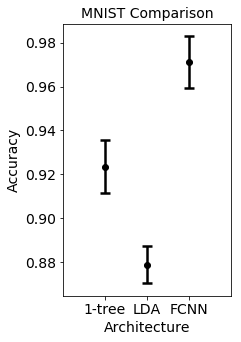

n = 10
()
()
1: 0.8051 +/- 0.0217
lda: 0.6849 +/- 0.0110
fcnn: 0.8880 +/- 0.0200


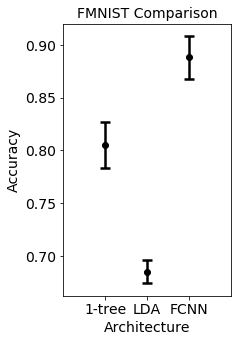

n = 10
()
()
1: 0.8193 +/- 0.0190
lda: 0.7087 +/- 0.0194
fcnn: 0.9720 +/- 0.0110


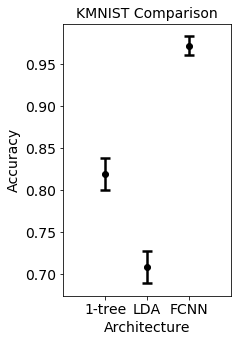

n = 10
()
()
1: 0.9586 +/- 0.0105
lda: 0.5886 +/- 0.0209
fcnn: 0.9883 +/- 0.0131


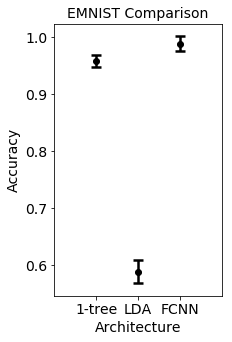

n = 10
()
()
1: 0.7043 +/- 0.0734
lda: 0.5278 +/- 0.0075
fcnn: 0.7500 +/- 0.1876


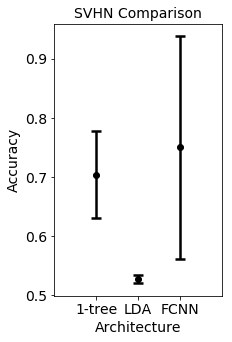

n = 10
()
()
1: 0.9719 +/- 0.0137
lda: 0.9059 +/- 0.0114
fcnn: 1.0000 +/- 0.0000


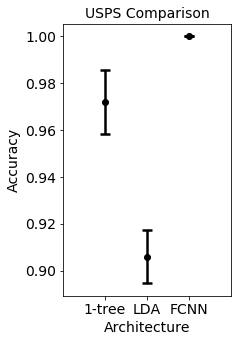

n = 10
()
()
1: 0.6385 +/- 0.0095
lda: 0.5796 +/- 0.0119
fcnn: 0.6550 +/- 0.0796


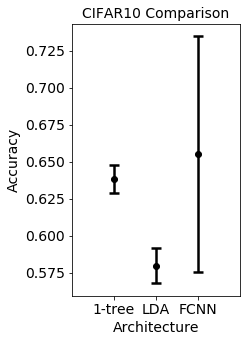

In [58]:

for ds, ds_name in enumerate(ds_set):


    fig, ax = plt.subplots(figsize=(3,5))
    
    x = [0]


    idx = np.where(acc[ds,:,-1] != 0)[-1]
    print('n =',len(idx))
    acc_mean = np.mean(acc[ds,idx,0], axis=0)
    print(acc_mean.shape)
    acc_std = np.std(acc[ds,idx,0], axis=0)
    print(acc_std.shape)

    ax.errorbar(1, acc_mean, yerr=acc_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')


    idx = np.where(acc_lin[ds,:] > 0.50)[0]
    acc_lin_mean = np.mean(acc_lin[ds,idx])
    acc_lin_std = np.std(acc_lin[ds,idx])
    ax.errorbar(2, acc_lin_mean, yerr=acc_lin_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')


    idx = np.where(acc_fc[ds,:] > 0.50)[0]
    acc_fc_mean = np.mean(acc_fc[ds,idx])
    acc_fc_std = np.std(acc_fc[ds,idx])
    ax.errorbar(3, acc_fc_mean, yerr=acc_fc_std, capsize=5, fmt='o', capthick=2.5, elinewidth=2.5, c='black')

    ax.set_xticks([1,2,3])
    ax.set_xticklabels(['1-tree', 'LDA','FCNN'], fontsize=14)
    plt.yticks(fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_xlabel('Architecture', fontsize=14)

    ax.set_xlim(left=0, right=4)
    ax.set_title(ds_name+' Comparison', fontsize=14)
#     ax.legend(['1-tree','linear (lda)','fcnn'])
    
    print('1: %.4f +/- %.4f' % (acc_mean, acc_std))
    print('lda: %.4f +/- %.4f' % (acc_lin_mean, acc_lin_std))
    print('fcnn: %.4f +/- %.4f' % (acc_fc_mean, acc_fc_std))
    
    plt.savefig(ds_name+'_single.svg', format='svg')
    
    plt.show()


In [63]:
torch.__version__

'1.4.0'

In [64]:
torchvision.__version__

'0.5.0'

In [66]:
import sklearn
sklearn.__version__

'0.19.2'

In [ ]:
class simple_fcnn(nn.Module):
    '''
    2 layer feed forward neural network. 
    Will code in Linear, Sigmoid, or ReLU activation functions.
    Activation = {'relu', 'sigmoid', 'linear'}
    '''
    
    def __init__(self, Input_size=3072, Hidden_size=3072, Output_size=1, Activation="relu"):
        super(simple_fcnn, self).__init__()
        '''
        Inputs: Input_size, Hidden_size, Output_size
        '''
        # Initialize architecture parameters
        self.Input_size = Input_size
        self.Hidden_size = Hidden_size
        self.Output_size = Output_size
        self.Activation = Activation
        
        
        # Initialize weights through He initialization (by default in nn.Linear)
        
        self.i2h = nn.Linear(Input_size, Hidden_size, bias=True)
        self.i2h.bias = torch.nn.Parameter(torch.zeros_like(self.i2h.bias))
#         self.i2h.weight = torch.nn.init.normal_(self.i2h.weight, mean=0.0, std=math.sqrt(2/(Input_size)))
        self.i2h.weight = torch.nn.init.kaiming_normal_(self.i2h.weight, a=0.01)


        # Initialize densly connected output layer
        self.h2o = nn.Linear(Hidden_size, Output_size)
        self.h2o.bias = torch.nn.Parameter(torch.zeros_like(self.h2o.bias))
        self.h2o.weight = torch.nn.init.kaiming_normal_(self.h2o.weight, a=0.01)
        
        # Initialize nonlinearities
        self.relu = nn.LeakyReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, x):
        '''
        Forward step for network. Establishes Architecture.
        Inputs: Input, Hidden
        Outputs: Output, Hidden
        '''
        # Prepare input for appropriate architecture

        
        # Set Activation function to calculate hidden layer

        if self.Activation == 'relu':
            Hidden = self.relu(self.i2h(x))
        else:
            Hidden = self.i2h(x)

        # Calculate Output layer
        Output = self.sigmoid(self.h2o(Hidden))
        return(Output)